In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

In [24]:
# a and b

data = pd.read_csv('auto.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [25]:
# Convert the horsepower feature to numeric, if it is not in numeric type within your program.

data.dtypes #to check the datatype of horsepower

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [26]:
data['horsepower'].unique() #seeing all the unique values that the horsepower has since it's a 'object' type.

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [27]:
problematic_values = data.loc[~data['horsepower'].str.isnumeric(), 'horsepower']
print("Problematic values:", problematic_values)

# the dataset contains missing values as '?'

Problematic values: 32     ?
126    ?
330    ?
336    ?
354    ?
Name: horsepower, dtype: object


In [28]:
#need to remove the '?' or necessarily drop those coloumns

data.replace('?', np.nan, inplace = True)
data.dropna(inplace = True)


In [29]:
print(len(data)) #removed five coloumns

392


In [30]:
data['horsepower'] = data['horsepower'].astype(int)

In [32]:
data.dtypes #converted horsepower into int32

mpg             float64
cylinders         int64
displacement    float64
horsepower        int32
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [35]:
# (d) Eliminate any features that are non-numeric.

#from above dtypes we know that feature name is not integer. Therefore dropping it.

data = data.drop('name', axis = 1)
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1
393,44.0,4,97.0,52,2130,24.6,82,2
394,32.0,4,135.0,84,2295,11.6,82,1
395,28.0,4,120.0,79,2625,18.6,82,1


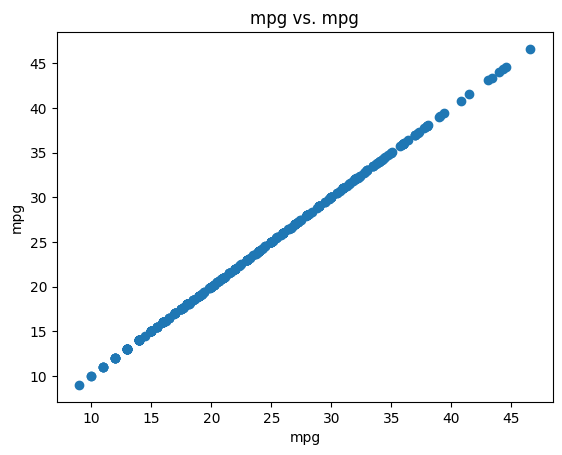

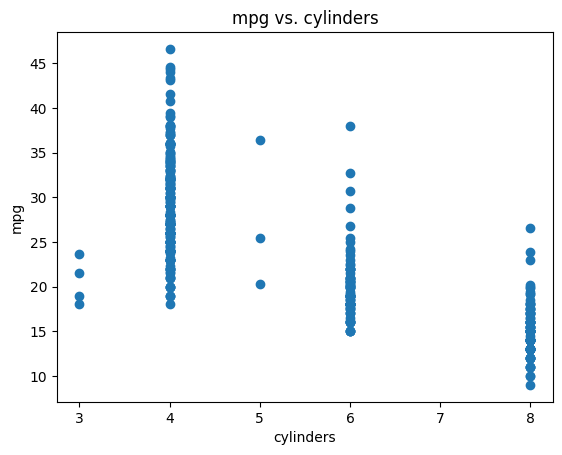

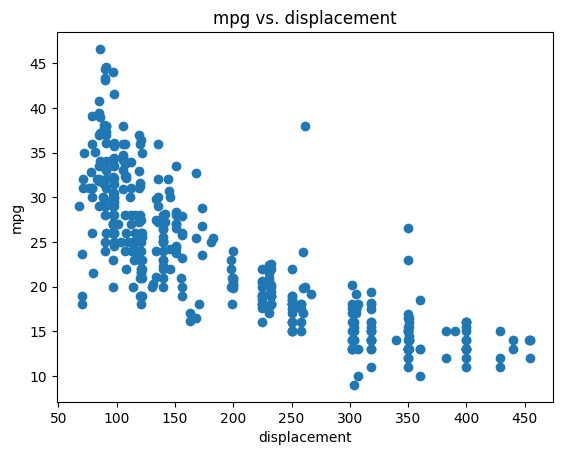

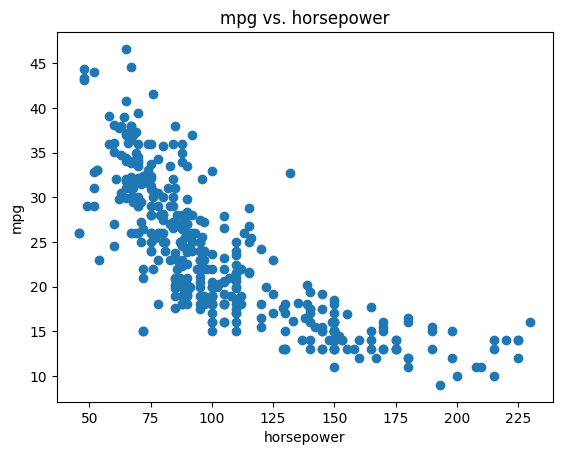

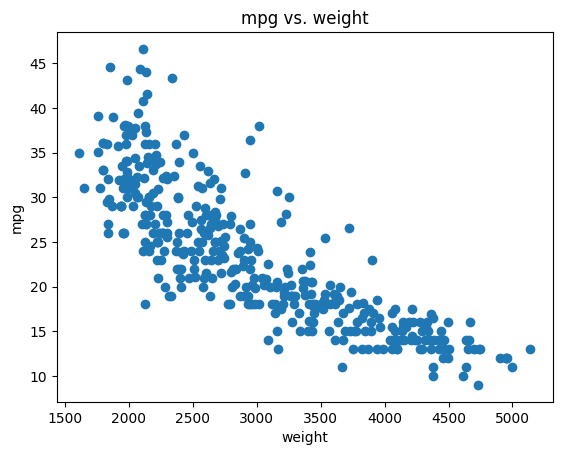

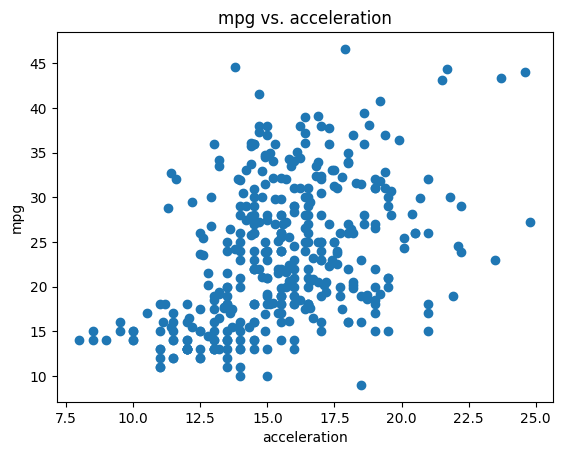

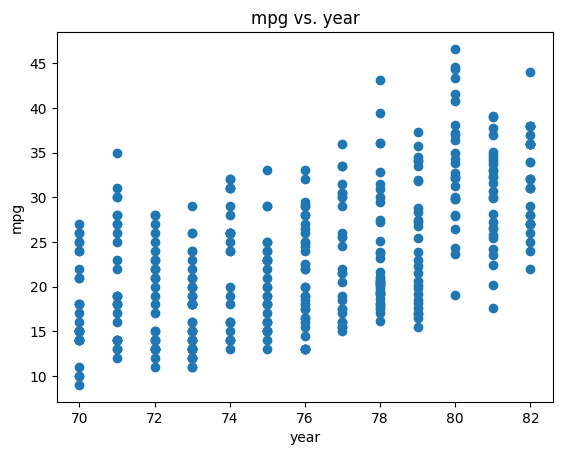

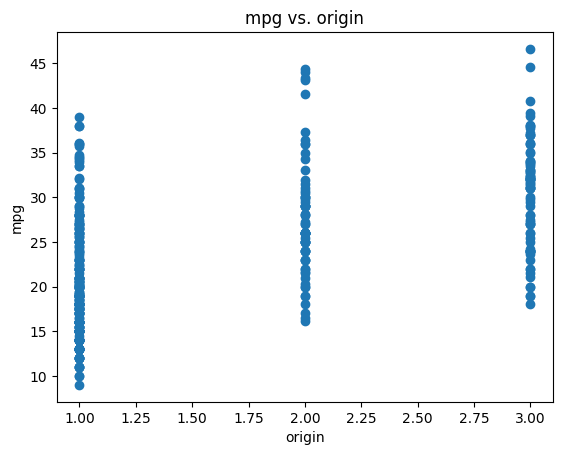

In [48]:
# Utilize plots to visualize the pairwise relationships of each descriptive feature with the target
# feature, mpg.

for col in data.columns:
    plt.scatter(data[col], data['mpg'])
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.title(f'mpg vs. {col}')
    plt.show()



<!-- (f) If any missing values are detected in the horsepower , impute them with the feature s mean value.
For validation, display both original missing values alongside their imputed replacements. -->

I've already removed the missing values from the dataset and hence I'll reload the data and replace the missing values with the mean of coloumn



In [54]:
# Replace '?' with NaN in the 'horsepower' column
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

# Identify missing values in the "horsepower" column
missing_values = df['horsepower'].isnull()

# Calculate the mean of "horsepower" excluding missing values
mean_horsepower = df.loc[~missing_values, 'horsepower'].mean()

# Impute missing values with the mean
df.loc[missing_values, 'horsepower'] = mean_horsepower

# Display original missing values and their imputed replacements
missing_data = pd.DataFrame({'Original Missing Values': df.loc[missing_values, 'horsepower'],
                             'Imputed Values': mean_horsepower},
                             index=df.loc[missing_values].index)

print("Missing Data and Imputed Values:")
print(missing_data)


Missing Data and Imputed Values:
     Original Missing Values  Imputed Values
32                104.469388      104.469388
126               104.469388      104.469388
330               104.469388      104.469388
336               104.469388      104.469388
354               104.469388      104.469388


In [62]:
#agin removing non-numerical feature
df = df.drop('name', axis = 1)


KeyError: "['name'] not found in axis"

In [64]:
# (g) Divide the data into training and test subsets using the holdout method; allocate 30% of testing, and the remaining 70% for training.

X = df.drop('mpg', axis = 1) #extracting features
y = df['mpg'] #extracting target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f'{X_train.shape} {y_train.shape} {X_test.shape} {y_test.shape}')

(277, 7) (277,) (120, 7) (120,)


In [66]:
# (h) Develop a regression model utilizing the training data and assess it using the test data.


model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Training RMSE:", train_rmse)
print("Training R2:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R2:", test_r2)

Training RMSE: 3.2361489758210453
Training R2: 0.8249702272176489
Test RMSE: 3.5144300834878406
Test R2: 0.8034858496219661


In [77]:
# Coefficients (slopes)
coefficients = model.coef_

# Intercept
intercept = model.intercept_

# Print the linear regression equation in the form y = mx + c
equation = "y = "
for i in range(len(coefficients)):
    equation += f"{coefficients[i]:.2f}x{i+1} + "
equation += f"{intercept:.2f}"

print("Linear Regression Equation:")
print(equation)

#therefore the the value of intercept is -14.80

print("Intercept (c):", intercept)

Linear Regression Equation:
y = -0.47x1 + 0.01x2 + -0.01x3 + -0.01x4 + 0.08x5 + 0.74x6 + 0.87x7 + -14.80
Intercept (c): -14.803388174331587


C:\Users\sharm\AppData\Local\Temp\ipykernel_4968\1637366064.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Intercept\n'+str(round(intercept, 2)),


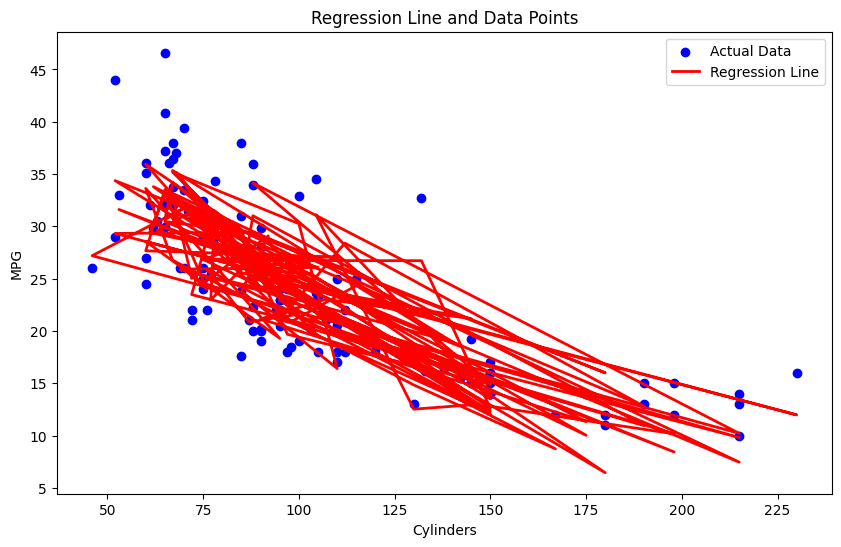

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['horsepower'], y_test, color='blue', label='Actual Data')
plt.plot(X_test['horsepower'], y_test_pred, color='red', linewidth=2, label='Regression Line')

# Annotate the intercept value
plt.annotate('Intercept\n'+str(round(intercept, 2)), 
             xy=(0, intercept), 
             xycoords='data',
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"),
             fontsize=12)

plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.legend()
plt.title('Regression Line and Data Points')
plt.show()


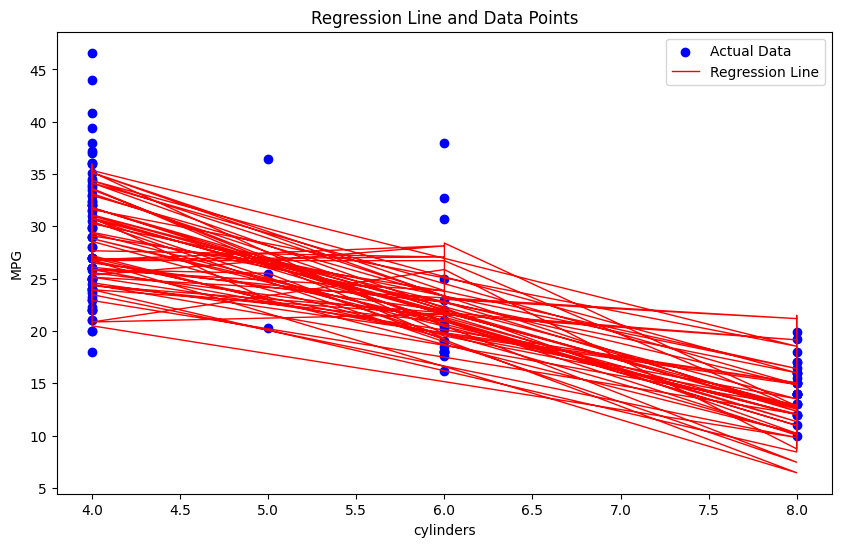

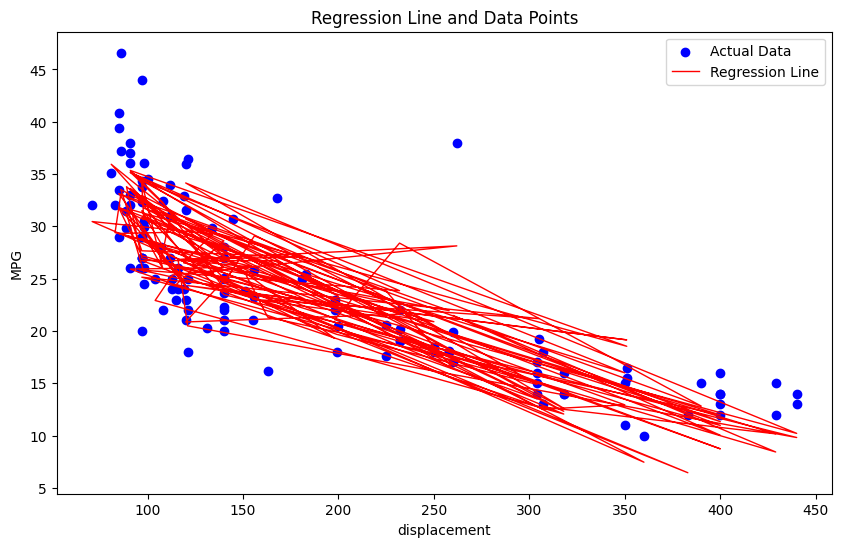

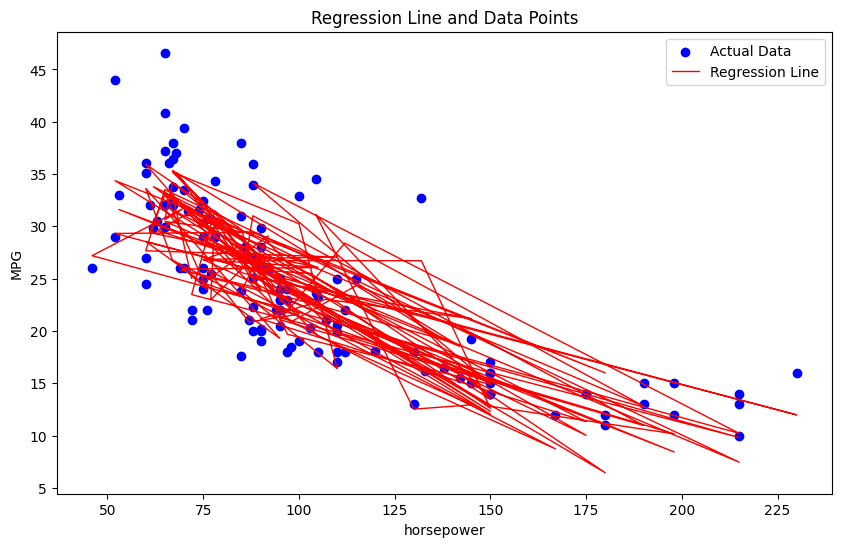

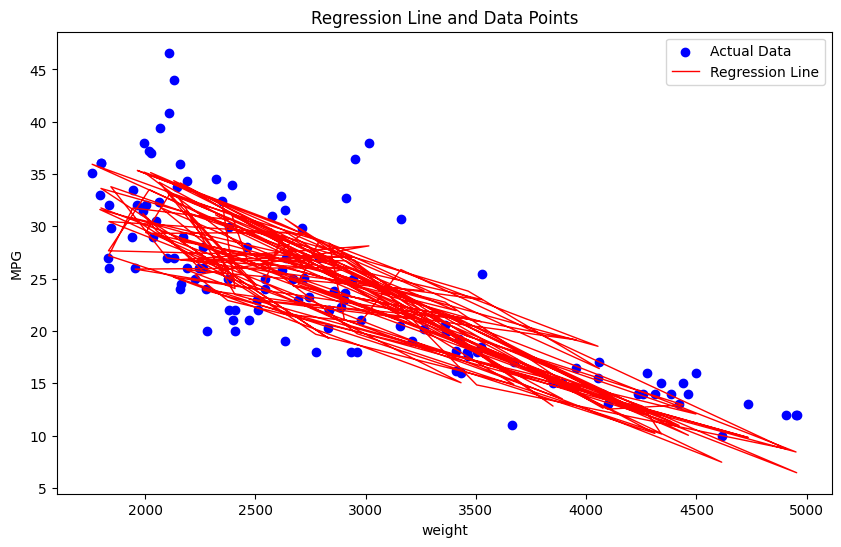

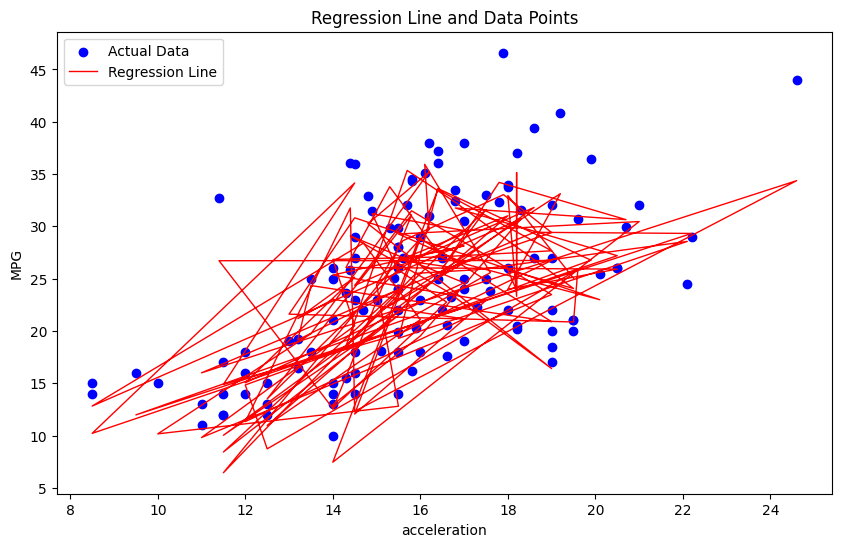

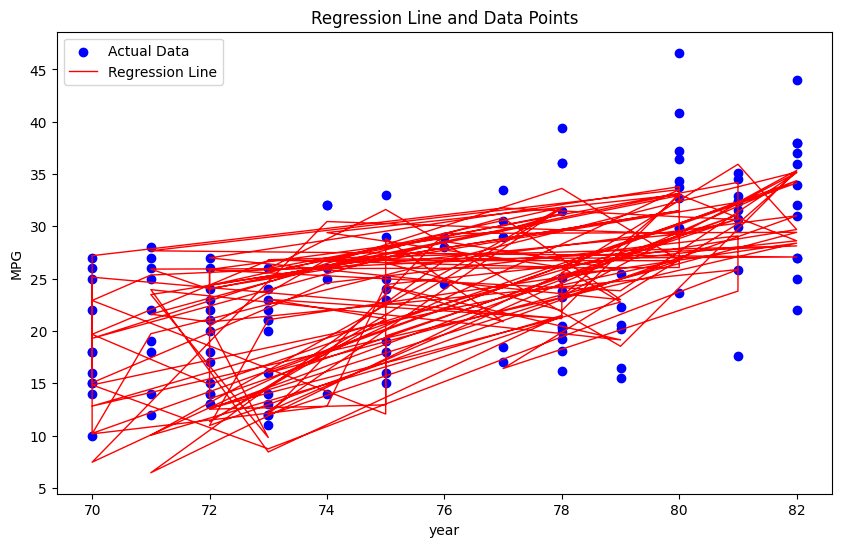

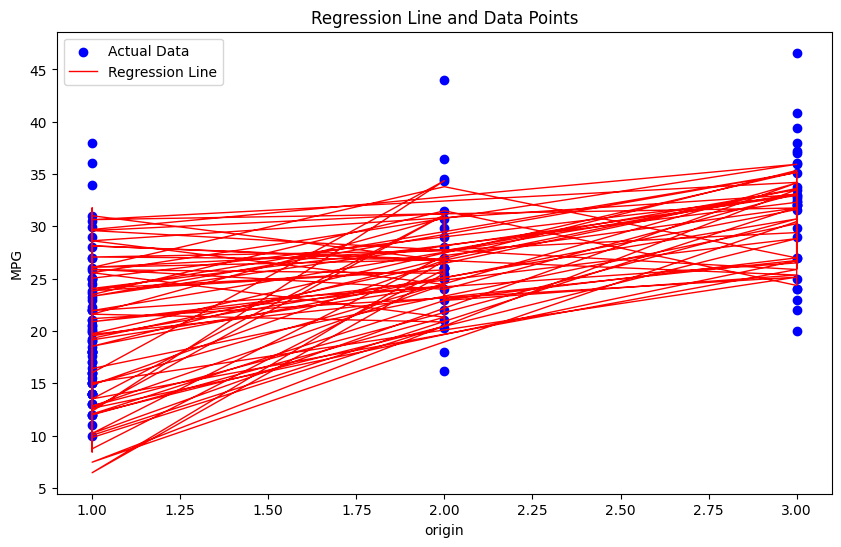

In [76]:
for col in X_test.columns:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[col], y_test, color='blue', label='Actual Data')
    plt.plot(X_test[col], y_test_pred, color='red', linewidth=1, label='Regression Line')

    # Annotate the intercept value
    plt.annotate('Intercept\n'+str(round(intercept, 2)), 
                 xy=(0, intercept), 
                 xycoords='data',
                 textcoords='offset points',
                 xytext=(10,10),  # Specify the text position
                 arrowprops=dict(arrowstyle="->"),
                 fontsize=12)

    plt.xlabel(col)
    plt.ylabel('MPG')
    plt.legend()
    plt.title('Regression Line and Data Points')
    plt.show()



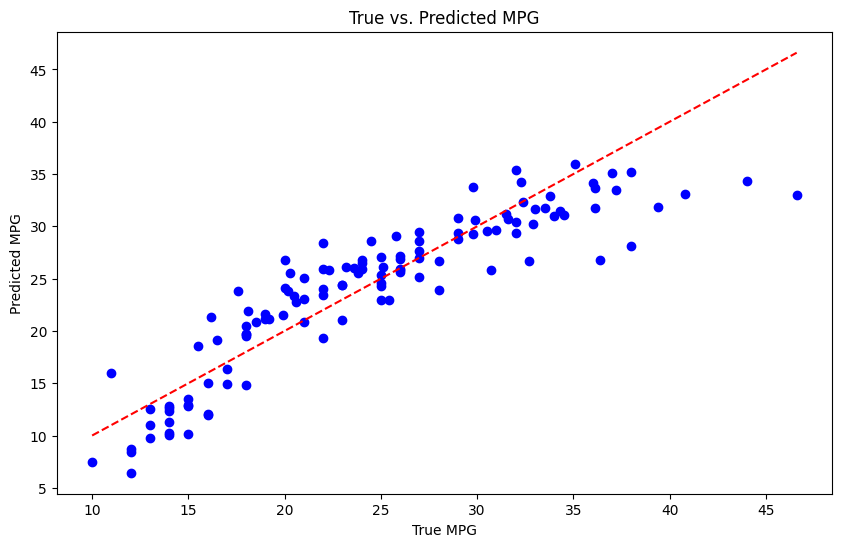

In [79]:
# (k) Present a prediction-true plot (y-y plot) where the x-axis represent the true target value and the yaxis
# denoted the predicted target value.

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')  # Diagonal line
plt.xlabel('True MPG')
plt.ylabel('Predicted MPG')
plt.title('True vs. Predicted MPG')
plt.show()

In [82]:
# (l) Evaluate the model using performance metrics

mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Display the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 2.7370066357220413
Mean Squared Error (MSE): 12.351218811724351
Root Mean Squared Error (RMSE): 3.5144300834878406
Coefficient of Determination (R-squared): 0.8034858496219661


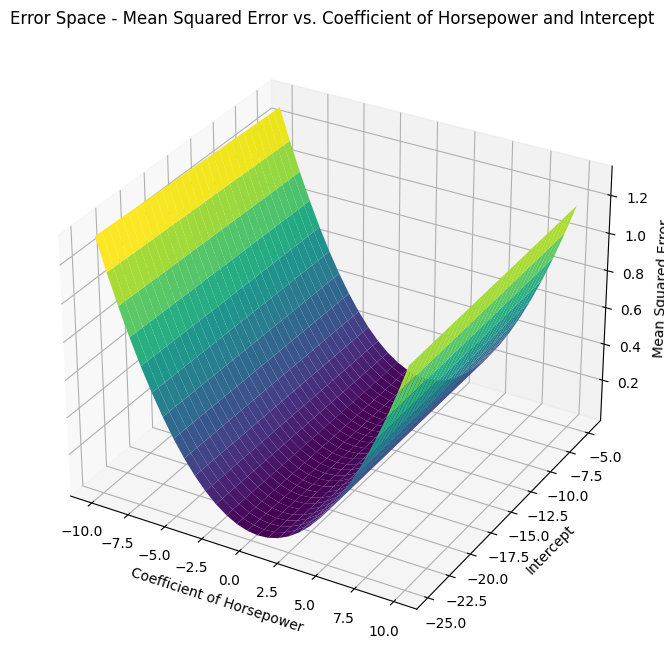

In [85]:
horsepower_coefficient_range = np.linspace(model.coef_[3] - 10, model.coef_[3] + 10, 30)
intercept_range = np.linspace(model.intercept_ - 10, model.intercept_ + 10, 30)

# Initialize an empty matrix to store MSE values
mse_values = np.zeros((len(horsepower_coefficient_range), len(intercept_range)))

# Calculate MSE for each combination of coefficient and intercept
for i in range(len(horsepower_coefficient_range)):
    for j in range(len(intercept_range)):
        # Calculate predicted values using the current coefficient and intercept
        predicted_values = X_test['horsepower'] * horsepower_coefficient_range[i] + intercept_range[j]
        mse_values[i, j] = mean_squared_error(y_test, predicted_values)

# Create a 3D surface plot
X, Y = np.meshgrid(horsepower_coefficient_range, intercept_range)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, mse_values.T, cmap='viridis')

ax.set_xlabel('Coefficient of Horsepower')
ax.set_ylabel('Intercept')
ax.set_zlabel('Mean Squared Error')
ax.set_title('Error Space - Mean Squared Error vs. Coefficient of Horsepower and Intercept')

plt.show()